In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Assignment- Respirer/cons_data_all_res.xlsx')

In [4]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True) # Setting up the main index as the time of the dataframe

In [5]:
hourly = df.resample('H').mean()     # Hourly analysis

<ipython-input-5-d5e73a877f09>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = df.resample('H').mean()     # Hourly analysis


Statistical Description

In [7]:
hourly_stats = hourly.describe()
print(hourly_stats)

         year     moy_date     doy_date       busday     dow_date  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.000000   
mean   2017.0     6.526027   183.000000     0.682192     3.991781   
std       0.0     3.448048   105.372043     0.465651     2.003519   
min    2017.0     1.000000     1.000000     0.000000     1.000000   
25%    2017.0     4.000000    92.000000     0.000000     2.000000   
50%    2017.0     7.000000   183.000000     1.000000     4.000000   
75%    2017.0    10.000000   274.000000     1.000000     6.000000   
max    2017.0    12.000000   365.000000     1.000000     7.000000   

              hour         temp        humid           r1           r2  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     11.500000    28.658419    66.912808     0.224942     0.228293   
std       6.922582     2.851937    18.325252     0.139805     0.196766   
min       0.000000    17.500000    14.160000     0.010500     0.004400   
25%     

Comparisons:

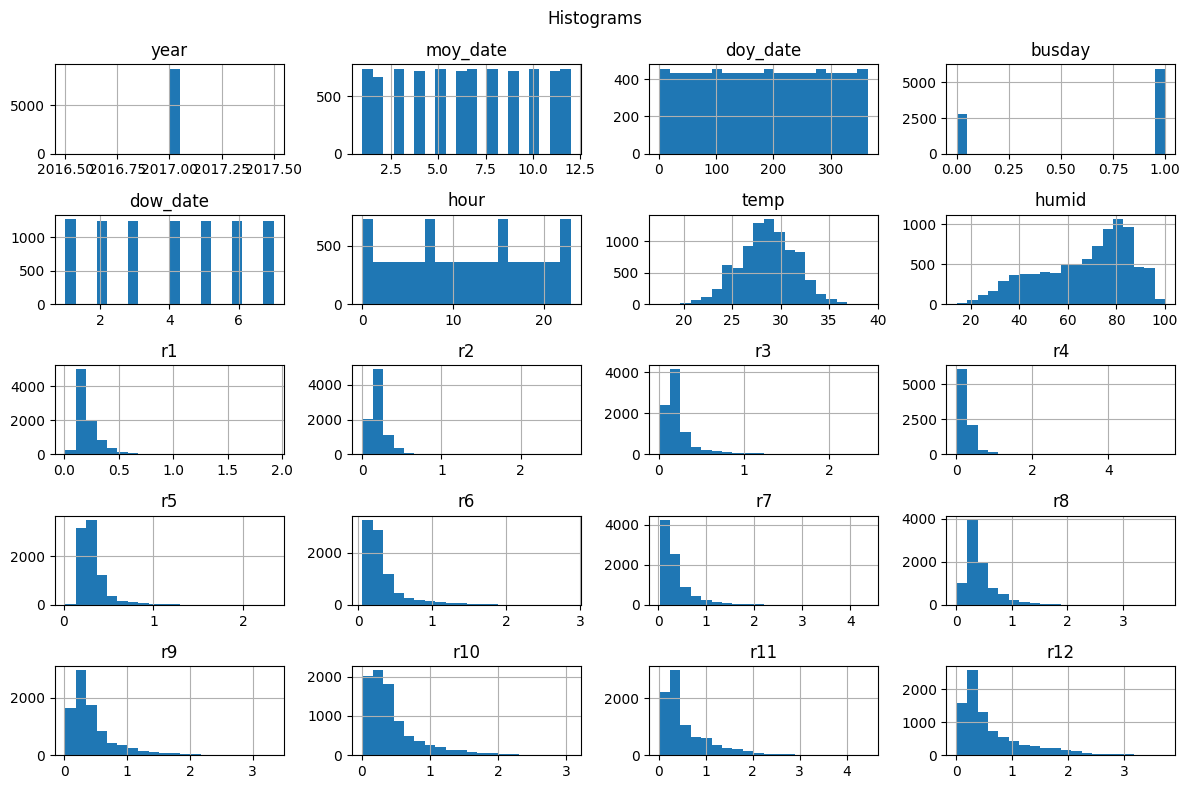

In [11]:
hourly.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms')
plt.tight_layout()
plt.show()

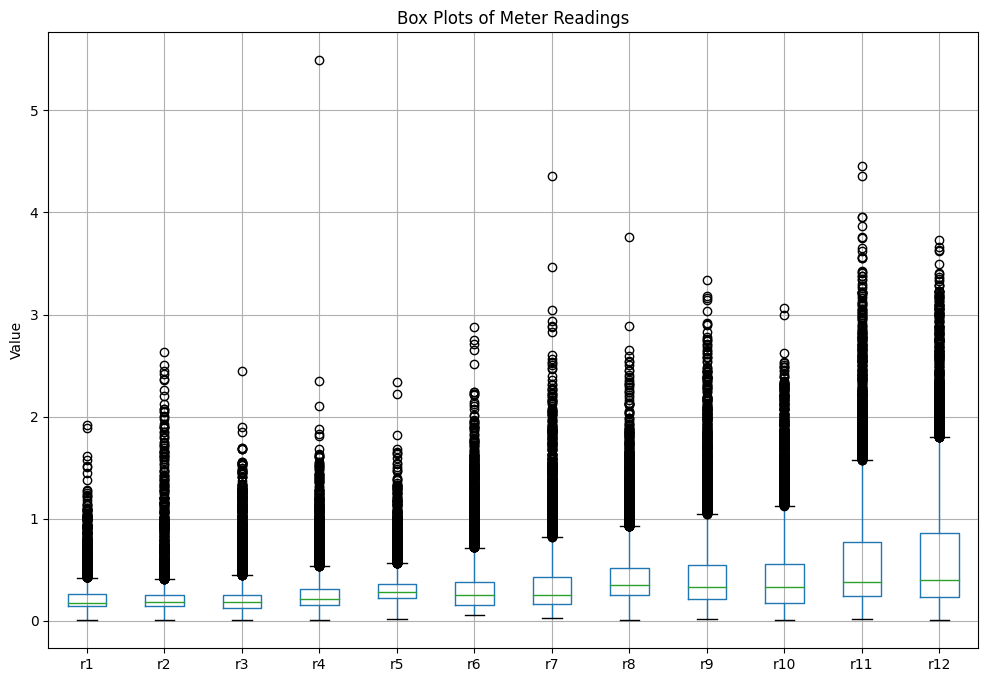

In [14]:
hourly.boxplot(column=['r1', 'r2', 'r3','r4','r5','r6','r7','r8','r9','r10','r11','r12'],figsize=(12, 8))  # Replace with all meter columns
plt.title('Box Plots of Meter Readings')
plt.ylabel('Value')
plt.show()

Time Series Analysis:

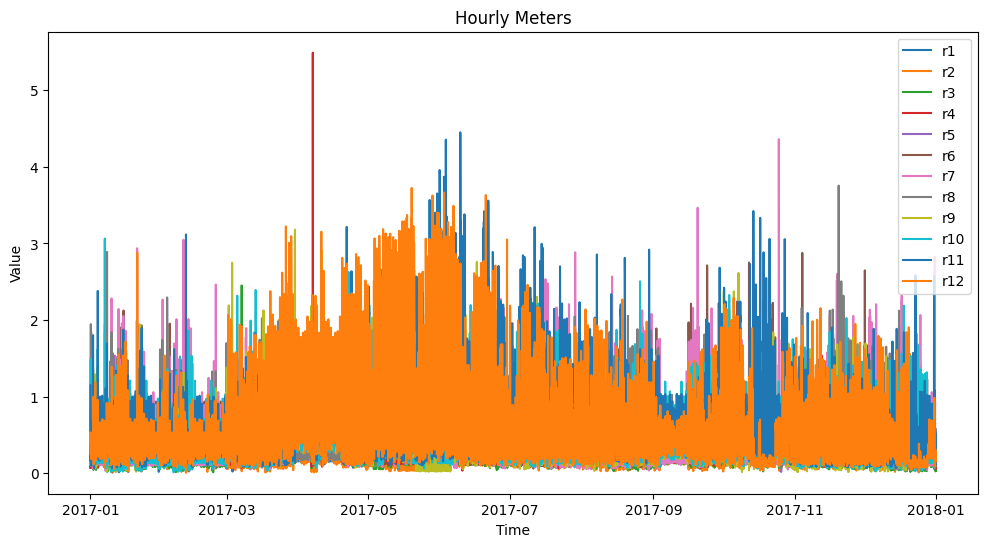

In [17]:
plt.figure(figsize=(12, 6))
columns=['r1', 'r2', 'r3','r4','r5','r6','r7','r8','r9','r10','r11','r12']
for column in columns:
    plt.plot(hourly.index, hourly[column], label=column)
plt.title('Hourly Meters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()